## Filtrado de imágenes en el dominio de la frecuencia

#### Por: Luis Antonio Correa Leyva
---

### RESUMEN

El filtrado digital de imágenes se basa en la operación de convolución o correlación entre la imagen y la función filtro. El cambio de dominio espacial de descripción de la imagen al frecuencial permite sustituir las convoluciones por productos escalares, con claras ventajas para el proceso de cálculo. Además, el filtrado en el dominio de la frecuencia permite mayor flexibilidad al ser posible seleccionar no sólo la dirección de filtrado, sino también los intervalos de frecuencia que requieran ser eliminados.

### NATURALEZA DEL FILTRADO EN EL DOMINIO ESPACIAL

El filtrado espacial es una operación de convolución de la imagen original con la función filtro. La operación de convolución entre las funciones $f_1(t)$ y $f_2(t)$ se define mediante una tercera función $f(t)$ del siguiente modo:

![](images/1.png)

Considerando, en general, una imagen digital de entrada finita discreta caracterizada por la función $z(i,j$, en la cual $i,j$ representan las coordenadas de los pixeles, una imagen de salida $z'(i,j)$ y un sistema de filtrado $W$, cuya función de respuesta es $w(m,n)$, siendo $m,n$ las coordenadas matriciales de la función de filtrado, que en general difieren del sistema de referencia de la imagen, puede describirse el proceso de filtrado como la siguiente operación de convolución:

![](images/2.png)

que es la ecuación del filtrado espacial de una imagen digital, donde el operador $w$ representa la matriz deslizante de dimensión $(2k+1)\times(2l+1)$ utilizada en el filtrado y donde i y j son respectivamente las líneas y columnas de la imagen. Los elementos $w_{m,n}$ constitutivos de la matriz son denominados coeficientes de peso, y el entorno $[-k,k]\times[-l, l]$, ventana del filtro. Usualmente $k = l$, es decir, la ventana de filtrado es cuadrada. Así, pues, el filtrado de una imagen mediante la matriz deslizante:

![](images/3.png)

dará lugar a una imagen de la forma:

![](images/4.png)

A medida que $k$ y $l$ son mayores, la influencia del entorno de cada pixel en el nivel digital asignado al pixel resultante será progresivamente mayor, modificándose en consecuencia la apariencia de la imagen filtrada. Habitualmente los filtros utilizados son de $3\times3$ elementos.

### FILTROS EN EL DOMINIO DE LA FRECUENCIA

El sistema matricial de coordenadas una imagen es lo que se denomina dominio espacial. Sin embargo, la misma imagen puede ser considerada como una función no periódica y definirse en otro espacio bidimensional, cuyos ejes vengan determinados por la amplitud y la frecuencia para cada dirección de la imagen. Este nuevo espacio de referencia para la descripción de la imagen se conoce como <b>dominio de la frecuencia</b>.

### LA TRANSFORMADA DE FOURIER

Se ha demostrado que cualquier función periódica $f(t)$ con un período T, que sea continua por tramos e integrable sobre cualquier intervalo, puede representarse mediante la serie de Fourier en forma exponencial compleja:

![](images/5.png)

La consistencia de la representación de una función periódica en forma de serie de Fourier se basa en que dicha función queda unívocamente definida mediante la especificación de los coeficientes $c$ de dicha serie. Pues bien, puede demostrarse asimismo que cualquier función $f(t)$ no periódica también puede representarse de un modo análogo de la forma:

![](images/6.png)

siendo esta expresión la representación de Fourier de una función aperiódica, similar a la serie de Fourier de la función periódica. La función $F(w)$ recibe el nombre de integral de Fourier o transformada de Fourier de la función $f(t)$ y puede expresarse:

![](images/7.png)

En virtud de ello, cualquier función no periódica dada tiene dos modos equivalentes de representación: uno en el dominio del tiempo $f(t)$ y otro en el de la frecuencia $F(w)$. La representación gráfica de $F(w)$ en función de la frecuencia angular $w$ se denomina <b>espectro de magnitud</b> de la función $f(t)$ y permite describirla en el dominio de la frecuencia, es decir explica la composición de frecuencias de la superposición de diversas funciones simples, de igual forma que la representación de $f(t)$ frente a $t$ define dicha función en el dominio del tiempo. 

La segunda expresión permite transformar la función $f(t)$, en el dominio del tiempo, en su equivalente $F(w)$, en el dominio de la frecuencia, pudiéndose analizar la primitiva función del tiempo mediante su correspondiente espectro. La primera expresión invierte el proceso, sintetizando el espectro de frecuencias para obtener de nuevo la función en términos de tiempo. 

### LA TRANSFORMADA DE FOURIER APLICADA A IMAGENES

Si en lugar de tiempo, se considera como variable independiente el espacio, concretamente los pixeles sucesivos de una misma fila de una imagen, el razonamiento anterior no varía sustancialmente, y se permite con ello describir la imagen digital en los dominios espacial y frecuencial, para lo cual únicamente es necesario readaptar el concepto de frecuencia, pasando de la tradicional definición de frecuencia temporal a la frecuencia espacial. Esta no describe otra cosa que el grado de repetitividad de los niveles digitales de una imagen.

Sin embargo esta exposición entraña una simplificación, al estar considerando una función discreta como es la imagen digital en lugar de una continua. Otros desarrollos matemáticos permiten definir una transformada discreta de Fourier (DFT) e incluso algortimos de aplicación muy sencilla para el cálculo de dicha función, tales como la transformada rápida de Fourier o FFT (Fast Fourier Transform)

#### Mostrar espectro de magnitud de una imagen (Python)

##### <b>Funciones utilizadas<b>:

`fft2` : Calcula la transformada discreta de Fourier sobre un arreglo bidimensional (Matriz o Imagen).
    
`ifft2` : Calcula la transformada inversa discreta de Fourier sobre un arreglo bidimensional (Matriz o Imagen)
    
`fftshift` : Mueve el componente de frecuencia cero al centro del espectro.
 
`ifftshift` : La operación inversa de `fftshift`.

In [1]:
from pylab import *
from skimage.color import rgb2gray

%matplotlib inline
rcParams['image.cmap'] = 'gray'

In [2]:
# Cagar imagen en escala de grises
img = rgb2gray(imread('taj.jpg'))

# Obtener transformada de Fourier
f = fft2(img)

# Mover el componente de frecuencia cero al centro del espectro
fshift = fftshift(f)

# calcular amplitud del espectro
mag_spec = 20*log(abs(fshift+1))

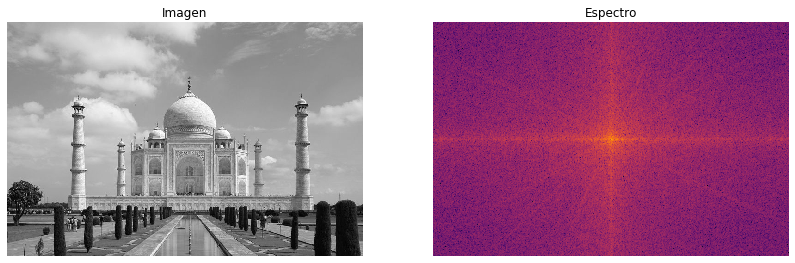

In [3]:
fig, (ax1, ax2) = subplots(1, 2, figsize=(14, 10))

ax1.imshow(img)
ax1.set_title("Imagen")
ax1.set_axis_off()

ax2.imshow(mag_spec, cmap="inferno")
ax2.set_title("Espectro")
ax2.set_axis_off()

show()

### LA OPERACION DE FILTRADO

Los filtros de frecuencia procesan una imagen trabajando sobre el dominio de la frecuencia en la transformada de Fourier de la imagen. Para ello, esta se modifica siguiendo el teorema de convolución correspondiente:

1. Se aplica la transformada de Fourier.
2. Se multiplica posteriormente por la función del filtro que ha sido escogido.
3. Para concluir re-transformándola al dominio espacial empleando la transformada inversa de Fourier.

![](images/9.png)

Segun el teorema de convolución

1. La transfromada de Fourier de la convolución entre dos funciones en el dominio espacial es igual al producto de las transformadas de Fourier de cada una de ellas.

2. La transformada inversa de Fourier de un producto de dos funciones en el dominio frecuencial es igual a la convolución de sus transformadas inversas.

Estas propiedades son de vital importancia en el tratamiento digital de imágenes, ya que, como se dijo al comienzo, la operación de filtrado es en realidad una convolución entre la función filtro y la imagen original. Poder realizar productos escalares en lugar de convoluciones es algo de gran interés por cuento permite reducir considerablemente el número de operaciones que el sistema de tratamiento deberá realizar, aún acosta de tener que efectuar operaciones auxiliares de transformación: una directa hacia el dominio de la frecuencia y otra inversa hacia el primitivo dominio espacial de la imagen.

#### Tipos de filtros:

Existen basicamente tres tipos distintos de filtros que pueden aplicarse:

* <b>Filtro paso bajo: </b>: atenúa las frecuencias altas y mantiene sin variaciones las bajas. El resultado en el dominio espacial es equivalente al de un filtro de suavizado, donde las altas frecuencias que son filtradas se corresponden con los cambios fuertes de intensidad. Consigue reducir el ruido suavizando las transiciones existentes.

* <b>Filtro paso alto: </b>: atenúa las frecuencias bajas manteniendo invariables las frecuencias altas. Puesto que las altas frecuencias corresponden en las imágenes a cambios bruscos de intensidad, este tipo de filtros es usado, porque entre otras ventajas, ofrece mejoras en la detección de bordes en el dominio espacial, ya que estos contienen gran cantidad de dichas frecuencias. Refuerzan los contrastes que se encuentran en la imagen.

* <b>Filtro paso banda: </b>: atenúa frecuencias muy altas o muy bajas manteniendo una banda de rango medio.

##### Ventajas

* Método simple y sencillo de implementar.
* Fácil asociación del concepto de frecuencia con ciertas características de la imagen; cambios de tonalidad suaves implican frecuencias bajas y cambios bruscos frecuencias altas.
* Proporciona flexibilidad en el diseño de soluciones de filtrado.
* Rapidez en el filtrado al utilizar el Teorema de la Convolucion.

##### Desventajas
* Se necesitan conocimientos en varios campos para desarrollar una aplicación para el procesamiento de imágenes.
* El ruido no puede ser eliminado completamente.

### IMPLEMENTACION (Python)

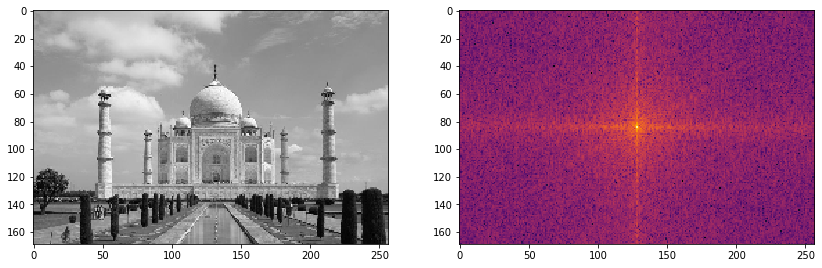

In [4]:
_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

img = img[::3, ::3]

ax0.imshow(img)

F = fftshift(fft2(img))

ax1.imshow(20*log(abs(F)), cmap="inferno")

show()

Usualmente cuando empleamos filtros en el dominio de la frecuencia andamos buscando <b>isotropía</b>, es decir, queremos filtros con fuerte <b>simetría rotacional</b>. Es muy conveniente utilizar este tipo de filtros en el dominio de la frecuencia para filtros <b>no separables</b> puesto que la simetría rotacional usualmente es un fuerte indicador de que el filtro no es separable. Entonces la eficiencia que ganamos en el dominio del espacio con filtros separables usualmente con filtros no separables no la podemos alcanzar y resulta más óptimo irnos al dominio de la frecuencia y trabajar con estos filtros en este dominio.

Para todos los filtros con simetría rotacional definiremos la función $\rho$:

![](images/13.png)

Que sería la distancia que tiene una frecuencia en el espectro hasta el origen.

### Filtro ideal

![](images/10.png)
![](images/11.png)

In [5]:
from skimage.draw import circle

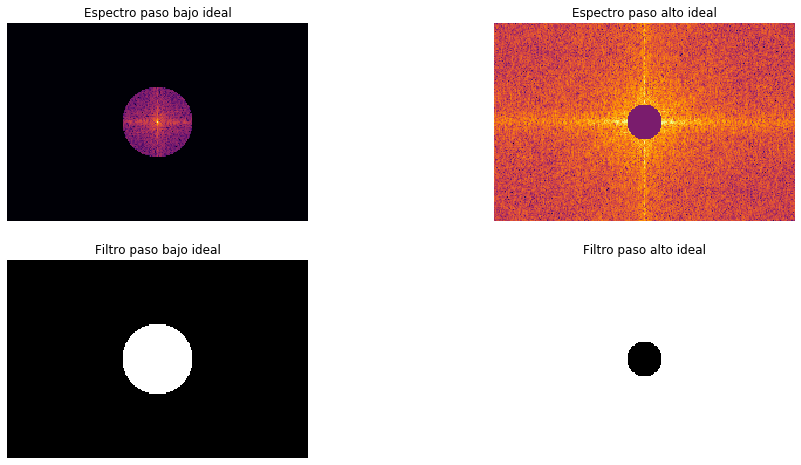

In [6]:
### Aplicar filtro
W = zeros_like(F)
W2 = ones_like(F)

M, N = W.shape

u , v = int(M/2), int(N/2)

rr, cc = circle(u, v, 30, shape=(M, N))

W[rr, cc] = 1

F2 = F * W

rr, cc = circle(u, v, 15, shape=(M, N))

W2[rr, cc] = 0

F3 = F * W2

### Mostrar el nuevo espectro
_, ((ax1, ax2), (ax3, ax4)) = subplots(2, 2, figsize=(16, 8))

ax1.imshow(20*log(abs(F2+1)), cmap="inferno")
ax1.set_title("Espectro paso bajo ideal")
ax1.set_axis_off()

ax2.imshow(20*log(abs(F3+1)), cmap="inferno")
ax2.set_title("Espectro paso alto ideal")
ax2.set_axis_off()

ax3.imshow(abs(W))
ax3.set_title("Filtro paso bajo ideal")
ax3.set_axis_off()

ax4.imshow(abs(W2))
ax4.set_title("Filtro paso alto ideal")
ax4.set_axis_off()

show()

Al hallarle a nuestro filtro $W$ su correspondiente transformada de Fourier obtenemos lo que llamamos <b>función de dispersión puntual</b>, que nos muestra la respuesta al impulso de dicho filtro.

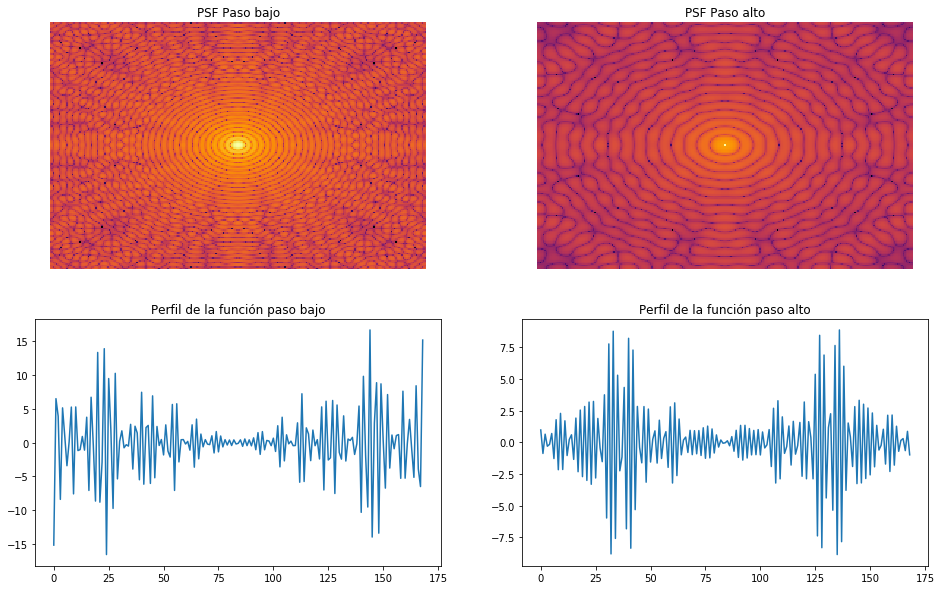

In [7]:
WF = fftshift(fft2(W))
W2F = fftshift(fft2(W2))

_, ((ax1, ax2), (ax3, ax4)) = subplots(2, 2, figsize=(16, 10))

ax1.imshow(20*log(abs(WF)), cmap="inferno")
ax1.set_title("PSF Paso bajo")
ax1.set_axis_off()

ax2.imshow(20*log(abs(W2F)), cmap="inferno")
ax2.set_title("PSF Paso alto")
ax2.set_axis_off()

ax3.plot(real(WF[..., 0]))
ax3.set_title("Perfil de la función paso bajo")

ax4.plot(real(W2F[..., 0]))
ax4.set_title("Perfil de la función paso alto")

show()

##### Reconstrucción de la imagen

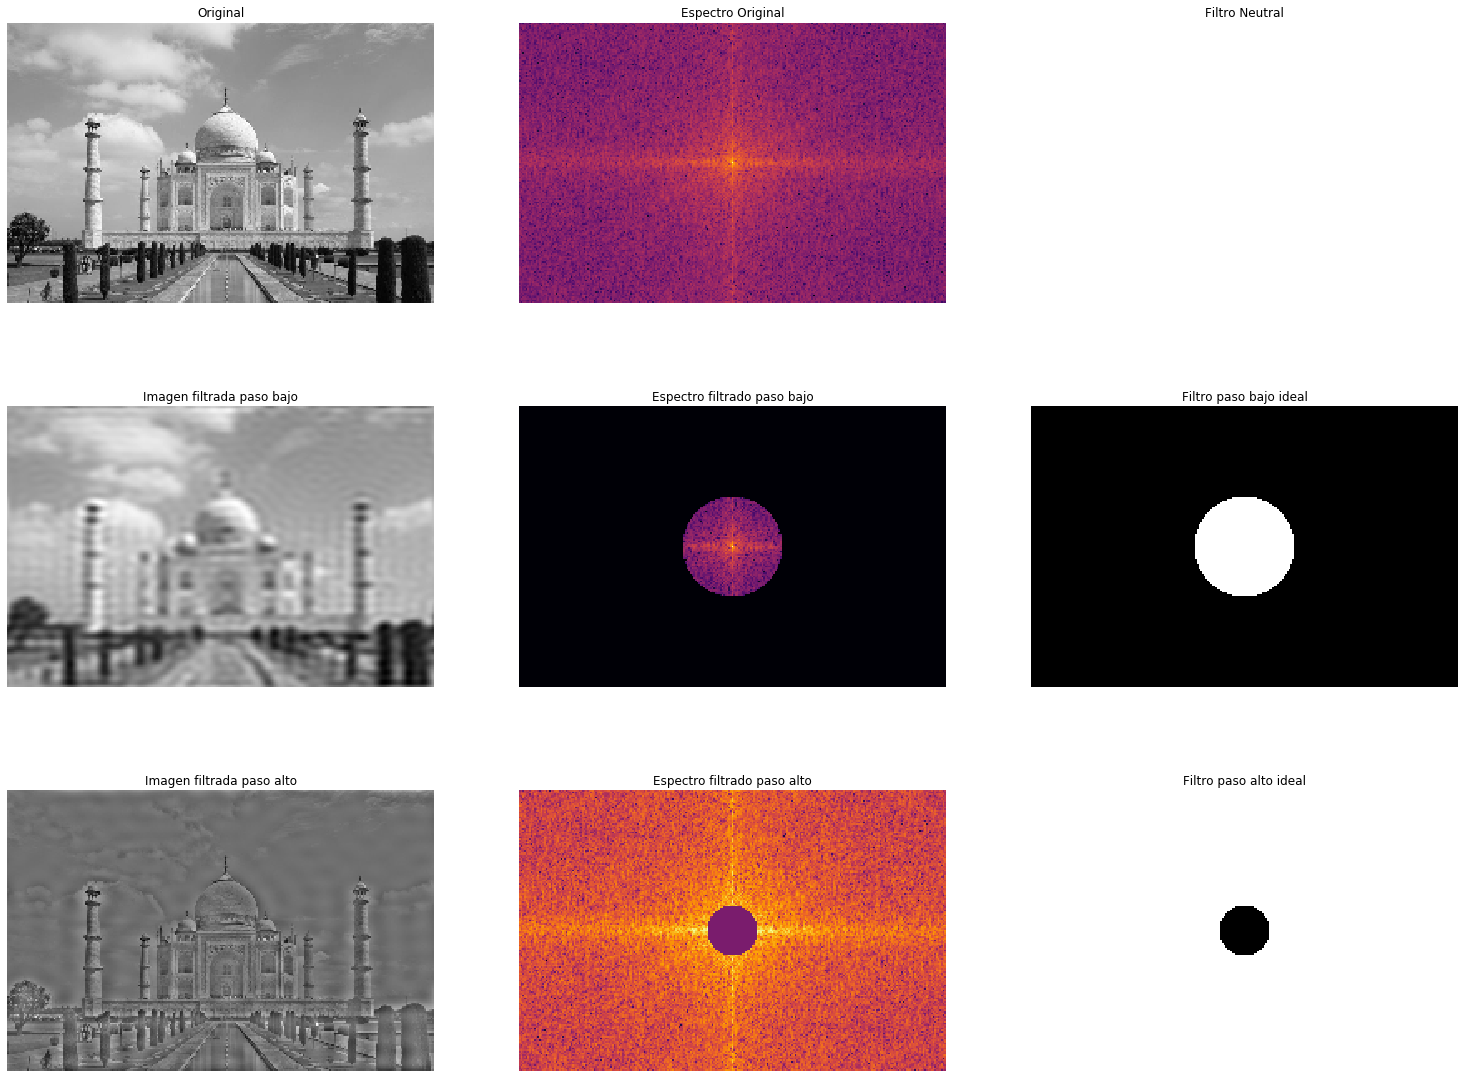

In [8]:
# Restaurar a dominio espacial
img_recon = real(ifft2(ifftshift(F2)))
img_recon2 = real(ifft2(ifftshift(F3)))

_, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = subplots(3, 3, figsize=(26, 20))

ax0.imshow(img)
ax0.set_title("Original")
ax0.set_axis_off()

ax1.imshow(20*log(abs(F)), cmap="inferno")
ax1.set_title("Espectro Original")
ax1.set_axis_off()

# Contruyendo filtro neutral
WN = ones_like(img)

ax2.imshow(abs(WN), cmap="binary")
ax2.set_title("Filtro Neutral")
ax2.set_axis_off()

ax3.imshow(img_recon)
ax3.set_title("Imagen filtrada paso bajo")
ax3.set_axis_off()

ax4.imshow(20*log(abs(F2+1)), cmap="inferno")
ax4.set_title("Espectro filtrado paso bajo")
ax4.set_axis_off()

ax5.imshow(abs(W))
ax5.set_title("Filtro paso bajo ideal")
ax5.set_axis_off()

ax6.imshow(img_recon2)
ax6.set_title("Imagen filtrada paso alto")
ax6.set_axis_off()

ax7.imshow(20*log(abs(F3+1)), cmap="inferno")
ax7.set_title("Espectro filtrado paso alto")
ax7.set_axis_off()

ax8.imshow(abs(W2))
ax8.set_title("Filtro paso alto ideal")
ax8.set_axis_off()

show()

Podemos ver en las imágenes filtradas un efecto de ondas que es típico de todo filtro ideal por el corte abrupto de frecuencias que realiza

### Filtro gaussiano

![](images/12.png)

In [23]:
from scipy.signal import gaussian

In [42]:
im = rgb2gray(imread('taj.jpg'))

Generar kernel en el dominio espacial

In [43]:
kernel = outer(gaussian(im.shape[0], 10), gaussian(im.shape[1], 10))

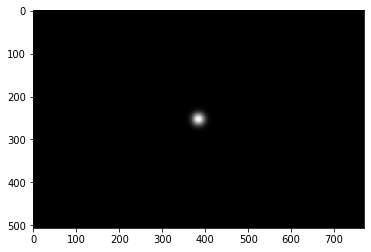

In [45]:
imshow(kernel)

Llevar imagen al dominio frecuencial

In [52]:
freq = fftshift(fft2(im))

El tamaño del kernel y la imagen deben ser los mismos

In [53]:
assert(freq.shape == kernel.shape)

In [54]:
R = freq*kernel

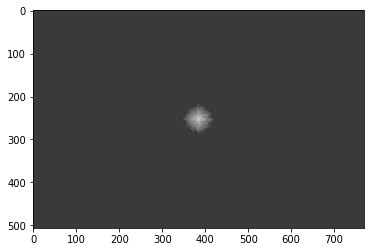

In [58]:
imshow(20*log(abs(R+1)))

In [61]:
RI = real(ifft2(ifftshift(R)))

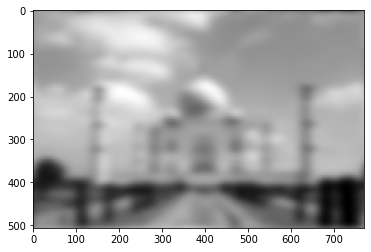

In [62]:
imshow(RI)